<a href="https://colab.research.google.com/github/carlyle1233/22-2_IT_mining/blob/main/python_basics2_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

## Pandas

In [2]:
x = [1, 1, 2, 2, 3, 4]

df_list=pd.DataFrame(x)
df_list
print(type(df_list))

<class 'pandas.core.frame.DataFrame'>


In [3]:
pd.DataFrame?

In [4]:
fpath= 'https://raw.githubusercontent.com/ykjoy/mining/main/chipotle.csv'

df=pd.read_csv(fpath)
df



,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [5]:
df.shape

(4622, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [7]:
df.describe(include='all')

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


In [8]:
df['quantity']

print('quantity의 최댓값:', df['quantity'].max())
print('quantity의 평균: ',df['quantity'].mean())

quantity의 최댓값: 15
quantity의 평균:  1.0757247944612722


In [9]:
df[['item_name','item_price']]

,item_name,item_price
0,Chips and Fresh Tomato Salsa,$2.39
1,Izze,$3.39
2,Nantucket Nectar,$3.39
3,Chips and Tomatillo-Green Chili Salsa,$2.39
4,Chicken Bowl,$16.98
...,...,...
4617,Steak Burrito,$11.75
4618,Steak Burrito,$11.75
4619,Chicken Salad Bowl,$11.25
4620,Chicken Salad Bowl,$8.75


In [10]:
df[['item_name','item_price']][:4]

,item_name,item_price
0,Chips and Fresh Tomato Salsa,$2.39
1,Izze,$3.39
2,Nantucket Nectar,$3.39
3,Chips and Tomatillo-Green Chili Salsa,$2.39


In [11]:
df[df.quantity>5]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25
3599,1443,7,Bottled Water,NaN,$10.50
3887,1559,8,Side of Chips,NaN,$13.52
4152,1660,10,Bottled Water,NaN,$15.00


In [12]:
df.query('quantity>5 & quantity<10')

,order_id,quantity,item_name,choice_description,item_price
3599,1443,7,Bottled Water,NaN,$10.50
3887,1559,8,Side of Chips,NaN,$13.52


##데이터 조작하기 

In [13]:
df_new=df.copy()
df_new=df_new.rename(columns={'item_name':'item'})
df_new=df_new.rename(columns={'order_id':'id'})
df_new=df_new.rename(columns={'item_price':'price'})
#df_new=df_new.rename(columns={'order_id':'id'})
#df_new=df_new.rename(columns={'order_id':'id'})
df_new

,id,quantity,item,choice_description,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [14]:
df['name_len']=df['item_name'].apply(lambda x:len(x))
df

,order_id,quantity,item_name,choice_description,item_price,name_len
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,28
1,1,1,Izze,[Clementine],$3.39,4
2,1,1,Nantucket Nectar,[Apple],$3.39,16
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,37
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,12
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,13
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,13
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,18
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,18


In [15]:
df.sort_values('quantity', ascending=False).head()

,order_id,quantity,item_name,choice_description,item_price,name_len
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25,28
4152,1660,10,Bottled Water,NaN,$15.00,13
3887,1559,8,Side of Chips,NaN,$13.52,13
3599,1443,7,Bottled Water,NaN,$10.50,13
2441,970,5,Bottled Water,NaN,$7.50,13


In [16]:
means=df.groupby('item_name').mean()

In [17]:
i=1
a=1

for i in range(1,10):
   print(a, 'x', i, '=', a*i)

1 x 1 = 1
1 x 2 = 2
1 x 3 = 3
1 x 4 = 4
1 x 5 = 5
1 x 6 = 6
1 x 7 = 7
1 x 8 = 8
1 x 9 = 9


In [18]:
t=1
i=1

for t in range(2,10):
  print('-----------')
  for i in range(1,10):
     print(t,'x',i,'=',t*i)



-----------
2 x 1 = 2
2 x 2 = 4
2 x 3 = 6
2 x 4 = 8
2 x 5 = 10
2 x 6 = 12
2 x 7 = 14
2 x 8 = 16
2 x 9 = 18
-----------
3 x 1 = 3
3 x 2 = 6
3 x 3 = 9
3 x 4 = 12
3 x 5 = 15
3 x 6 = 18
3 x 7 = 21
3 x 8 = 24
3 x 9 = 27
-----------
4 x 1 = 4
4 x 2 = 8
4 x 3 = 12
4 x 4 = 16
4 x 5 = 20
4 x 6 = 24
4 x 7 = 28
4 x 8 = 32
4 x 9 = 36
-----------
5 x 1 = 5
5 x 2 = 10
5 x 3 = 15
5 x 4 = 20
5 x 5 = 25
5 x 6 = 30
5 x 7 = 35
5 x 8 = 40
5 x 9 = 45
-----------
6 x 1 = 6
6 x 2 = 12
6 x 3 = 18
6 x 4 = 24
6 x 5 = 30
6 x 6 = 36
6 x 7 = 42
6 x 8 = 48
6 x 9 = 54
-----------
7 x 1 = 7
7 x 2 = 14
7 x 3 = 21
7 x 4 = 28
7 x 5 = 35
7 x 6 = 42
7 x 7 = 49
7 x 8 = 56
7 x 9 = 63
-----------
8 x 1 = 8
8 x 2 = 16
8 x 3 = 24
8 x 4 = 32
8 x 5 = 40
8 x 6 = 48
8 x 7 = 56
8 x 8 = 64
8 x 9 = 72
-----------
9 x 1 = 9
9 x 2 = 18
9 x 3 = 27
9 x 4 = 36
9 x 5 = 45
9 x 6 = 54
9 x 7 = 63
9 x 8 = 72
9 x 9 = 81


## 데이터 탐색 

In [19]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd 

chipo=pd.read_csv('/content/drive/MyDrive/Colab Notebooks_school/Colab Notebooks/아비혁/chipotle.csv')

display(chipo.head(10))
print(chipo.info())

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


### 1. 기술통계 정보 

In [21]:
chipo['order_id']=chipo['order_id'].astype(str)

print(chipo.describe())

print('총 주문 개수:', len(chipo['order_id'].unique()))
print('주문 받은 음식의 종류:', len(chipo['item_name'].unique()))

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000
총 주문 개수: 1834
주문 받은 음식의 종류: 50


### 2. 데이터 탐색과 시각화 

In [22]:
#주문 횟수가 많은 음식 10개 보여주기 

item_count=chipo['item_name'].value_counts()
print(item_count[:10])

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64


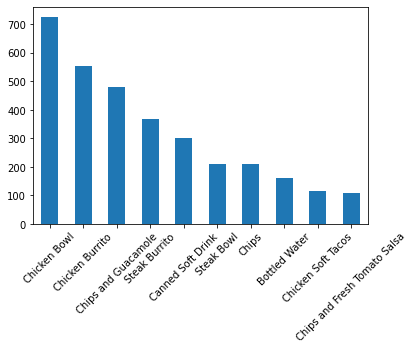

In [23]:
item_count[:10].plot.bar(rot=45)

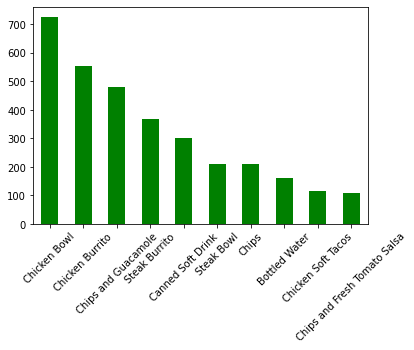

In [24]:
item_count[:10].plot(kind='bar',rot=45, color='g')

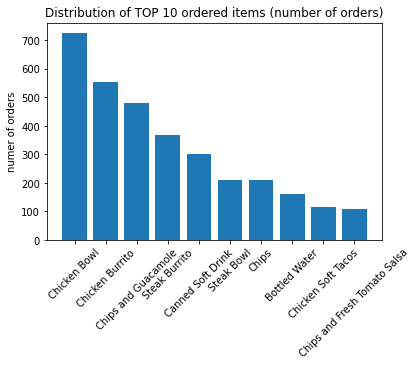

In [25]:
%matplotlib inline 
import matplotlib.pyplot as plt

x=item_count[:10].index.tolist()
y=item_count[:10].values.tolist()

plt.bar(x,y,align='center')
plt.ylabel('numer of orders')
plt.title('Distribution of TOP 10 ordered items (number of orders)')
plt.xticks(rotation=45)
plt.show()

In [26]:
#주문량이 가장 많은 음식 5가지 

order_quantity=chipo.groupby('item_name')['quantity'].sum()
order_sorted=order_quantity.sort_values(ascending=False)[:5]
print(order_sorted)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64


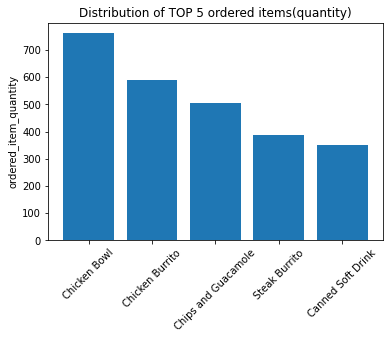

In [27]:
item_list=order_sorted.index.tolist()
item_qty=order_sorted.values.tolist()

plt.bar(item_list, item_qty, align='center')
plt.ylabel('ordered_item_quantity')
plt.title('Distribution of TOP 5 ordered items(quantity)')
plt.xticks(rotation=45)
plt.show()

### 3. 데이터 전처리 

In [28]:
#가격, 수치 계산 >> 숫자로 변환시키기 

display(chipo['item_price'].head())




#chipo.describe()

#chipo.head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [29]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [30]:
display(chipo['item_price'].head())
chipo.describe()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [31]:
chipo['item_price'] = chipo['item_price'].astype(float)
display(chipo['item_price'].head())
chipo.describe()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [32]:
# 가격이 가장 비싼 음식 10개 

#한 개의 음식이 주문된 경우만 찾아 음식별 가장 낮은 가격 찾기 

chipo_one_item=chipo[chipo.quantity==1]
price_per_item=chipo_one_item.groupby('item_name')['item_price'].min()
#가격이 높은 순으로 10개 보여주기 
print(price_per_item.sort_values(ascending=False)[:10])

item_name
Steak Salad Bowl         9.39
Barbacoa Salad Bowl      9.39
Carnitas Salad Bowl      9.39
Carnitas Soft Tacos      8.99
Carnitas Crispy Tacos    8.99
Steak Soft Tacos         8.99
Carnitas Salad           8.99
Carnitas Bowl            8.99
Barbacoa Soft Tacos      8.99
Barbacoa Crispy Tacos    8.99
Name: item_price, dtype: float64


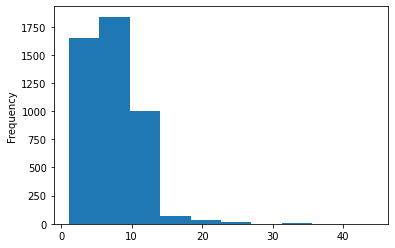

In [33]:
chipo['item_price'].plot.hist()

## 연습문제

#### 연습1. Chipotle 주문 데이터 이용

In [34]:
##1. 주문량이 가장 적은 메뉴 10개 보여주기 

order_quantity1=chipo.groupby('item_name')['quantity'].sum()
order_sorted1=order_quantity1.sort_values(ascending=True)[:10]
print(order_sorted1)

item_name
Carnitas Salad                       1
Veggie Crispy Tacos                  1
Chips and Mild Fresh Tomato Salsa    1
Crispy Tacos                         2
Salad                                2
Bowl                                 4
Steak Salad                          4
Veggie Salad                         6
Carnitas Salad Bowl                  6
Burrito                              6
Name: quantity, dtype: int64


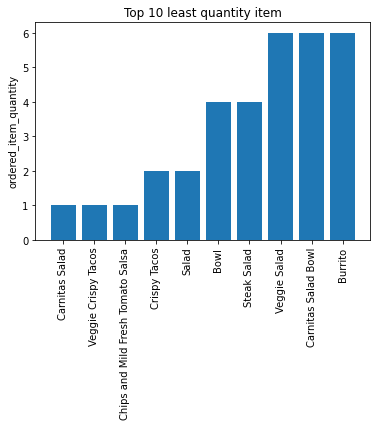

In [35]:
item_list1=order_sorted1.index.tolist()
item_qty1=order_sorted1.values.tolist()

plt.bar(item_list1, item_qty1, align='center')
plt.ylabel('ordered_item_quantity')
plt.title('Top 10 least quantity item')
plt.xticks(rotation=90)
plt.show()

In [36]:
##2. 가격이 가장 저렴한 메뉴 5개 

# 가격이 가장 비싼 음식 10개 

#한 개의 음식이 주문된 경우만 찾아 음식별 가장 낮은 가격 찾기 
chipo_one_item1=chipo[chipo.quantity==1]
price_per_item1=chipo_one_item1.groupby('item_name')['item_price'].min()
price_per_item1=price_per_item1.sort_values(ascending=True)[:5]

#가격이 높은 순으로 10개 보여주기 
print(price_per_item1)

item_name
Bottled Water        1.09
Canned Soda          1.09
Canned Soft Drink    1.25
Side of Chips        1.69
Chips                1.99
Name: item_price, dtype: float64


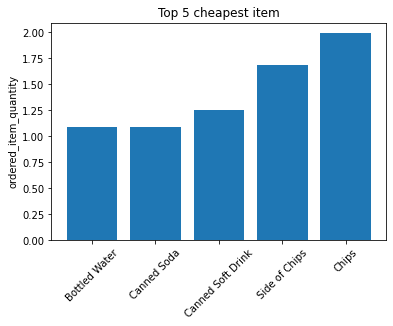

In [37]:
item_list2=price_per_item1.index.tolist()
item_qty2=price_per_item1.values.tolist()

plt.bar(item_list2, item_qty2, align='center')
plt.ylabel('ordered_item_quantity')
plt.title('Top 5 cheapest item')
plt.xticks(rotation=45)
plt.show()

#### 연습2: 공공데이터 이용 

In [38]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks_school/Colab Notebooks/아비혁/국립암센터_암발생 통계 정보_20211229.csv' )
df

,발생연도,성별,국제질병분류,암종,연령군,발생자수,조발생률
0,1999,남녀전체,00. All cancers,모든암,00-04세,538,16.1
1,1999,남녀전체,00. All cancers,모든암,05-09세,297,8.6
2,1999,남녀전체,00. All cancers,모든암,10-14세,306,9.6
3,1999,남녀전체,00. All cancers,모든암,15-19세,527,13.1
4,1999,남녀전체,00. All cancers,모든암,20-24세,719,18.3
...,...,...,...,...,...,...,...
31345,1999-2019,여자,24. All ohter cancers,기타 암,70-74세,"15,984",93.5
31346,1999-2019,여자,24. All ohter cancers,기타 암,75-79세,"17,032",131.2
31347,1999-2019,여자,24. All ohter cancers,기타 암,80-84세,"13,854",169.8
31348,1999-2019,여자,24. All ohter cancers,기타 암,85세이상,"11,867",205.5


In [39]:
df.columns

Index(['발생연도', '성별', '국제질병분류', '암종', '연령군', '발생자수', '조발생률'], dtype='object')

In [40]:
df.rename(columns = {'발생연도':'year_of_occurrence',
                     '성별':'gender',
                     '국제질병분류':'ICD',
                     '암종':'cancer_type',
                     '연령군':'age_range',
                     '발생자수':'patient_num',
                     '조발생률':'crude_incidence_rate', 
                     '활동유효한계':'activity_effective_limits'},inplace=True)

#조발생률: 해당 관찰기간동안 특정 인구집단에서 새롭게 발생한 암환자수를 전체인구로 나눈 값 
#일반적으로 인구 100,000명당 발생하는 비율로 표시된다. 
df


,year_of_occurrence,gender,ICD,cancer_type,age_range,patient_num,crude_incidence_rate
0,1999,남녀전체,00. All cancers,모든암,00-04세,538,16.1
1,1999,남녀전체,00. All cancers,모든암,05-09세,297,8.6
2,1999,남녀전체,00. All cancers,모든암,10-14세,306,9.6
3,1999,남녀전체,00. All cancers,모든암,15-19세,527,13.1
4,1999,남녀전체,00. All cancers,모든암,20-24세,719,18.3
...,...,...,...,...,...,...,...
31345,1999-2019,여자,24. All ohter cancers,기타 암,70-74세,"15,984",93.5
31346,1999-2019,여자,24. All ohter cancers,기타 암,75-79세,"17,032",131.2
31347,1999-2019,여자,24. All ohter cancers,기타 암,80-84세,"13,854",169.8
31348,1999-2019,여자,24. All ohter cancers,기타 암,85세이상,"11,867",205.5


##### unique값 확인

In [41]:
df['year_of_occurrence'].unique()

array(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '1999-2019'], dtype=object)

In [42]:
df['ICD'].unique()

array(['00. All cancers', '01. C00-C14', '02. C15', '03. C16',
       '04. C18-C20', '05. C22', '06. C23-C24', '07. C25', '08. C32',
       '09. C33-C34', '10. C50', '11. C53', '12. C54', '13. C56',
       '14. C61', '15. C62', '16. C64', '17. C67', '18. C70-C72',
       '19. C73', '20. C81', '21. C82-C86,C96', '22. C90', '23. C91-C95',
       '24. All ohter cancers'], dtype=object)

In [43]:
df['cancer_type'].unique()

array(['모든암', '입술, 구강 및 인두', '식도', '위', '대장', '간', '담낭 및 기타담도', '췌장',
       '후두', '폐', '유방', '자궁경부', '자궁체부', '난소', '전립선', '고환', '신장', '방광',
       '뇌 및 중추신경계', '갑상선', '호지킨림프종', '비호지킨림프종', '다발성 골수종', '백혈병', '기타 암'],
      dtype=object)

In [44]:
df['age_range'].unique()

array(['00-04세', '05-09세', '10-14세', '15-19세', '20-24세', '25-29세',
       '30-34세', '35-39세', '40-44세', '45-49세', '50-54세', '55-59세',
       '60-64세', '65-69세', '70-74세', '75-79세', '80-84세', '85세이상', '전체'],
      dtype=object)

##### 데이터 값 변경 

In [45]:
df = df.replace({'ICD' : '00. All cancers'}, 'All cancers')
df = df.replace({'ICD' : '01. C00-C14'}, 'C00-C14')
df = df.replace({'ICD' : '02. C15'}, 'C15')
df = df.replace({'ICD' : '03. C16'}, 'C16')
df = df.replace({'ICD' : '04. C18-C20'}, 'C18-C20')

df = df.replace({'ICD' : '05. C22'}, 'C22')
df = df.replace({'ICD' : '06. C23-C24'}, 'C23-C24')
df = df.replace({'ICD' : '07. C25'}, 'C25')
df = df.replace({'ICD' : '08. C32'}, 'C32')
df = df.replace({'ICD' : '09. C33-C34'}, 'C33-C34')
df = df.replace({'ICD' : '10. C50'}, 'C50')
df = df.replace({'ICD' : '11. C53'}, 'C53')
df = df.replace({'ICD' : '12. C54'}, 'C54')
df = df.replace({'ICD' : '13. C56'}, 'C56')
df = df.replace({'ICD' : '14. C61'}, 'C61')


df = df.replace({'ICD' : '15. C62'}, 'C62')
df = df.replace({'ICD' : '16. C64'}, 'C64')
df = df.replace({'ICD' : '17. C67'}, 'C67')
df = df.replace({'ICD' : '18. C70-C72'}, 'C70-C72')
df = df.replace({'ICD' : '19. C73'}, 'C73')
df = df.replace({'ICD' : '20. C81'}, 'C81')
df = df.replace({'ICD' : '21. C82-C86,C96'}, 'C82-C86,C96')
df = df.replace({'ICD' : '22. C90'}, 'C90')
df = df.replace({'ICD' : '23. C91-C95'}, 'C91-C95')
df = df.replace({'ICD' : '24. All ohter cancers'}, 'All other cancers')


In [46]:
df['ICD'].unique()

array(['All cancers', 'C00-C14', 'C15', 'C16', 'C18-C20', 'C22',
       'C23-C24', 'C25', 'C32', 'C33-C34', 'C50', 'C53', 'C54', 'C56',
       'C61', 'C62', 'C64', 'C67', 'C70-C72', 'C73', 'C81', 'C82-C86,C96',
       'C90', 'C91-C95', 'All other cancers'], dtype=object)

In [47]:
df = df.replace({'age_range' : '00-04세'}, '00-04')
df = df.replace({'age_range' : '05-09세'}, '05-09')
df = df.replace({'age_range' : '10-14세'}, '10-14')
df = df.replace({'age_range' : '15-19세'}, '15-19')


df = df.replace({'age_range' : '20-24세'}, '20-24')
df = df.replace({'age_range' : '25-29세'}, '25-29')
df = df.replace({'age_range' : '30-34세'}, '30-34')
df = df.replace({'age_range' : '35-39세'}, '35-39')

df = df.replace({'age_range' : '40-44세'}, '40-44')
df = df.replace({'age_range' : '45-49세'}, '45-49')
df = df.replace({'age_range' : '50-54세'}, '50-54')
df = df.replace({'age_range' : '55-59세'}, '55-59')

df = df.replace({'age_range' : '60-64세'}, '60-64')
df = df.replace({'age_range' : '65-69세'}, '65-69')
df = df.replace({'age_range' : '70-74세'}, '70-74')
df = df.replace({'age_range' : '75-79세'}, '75-79')

df = df.replace({'age_range' : '80-84세'}, '80-84')
df = df.replace({'age_range' : '85세이상'}, '85~')
df = df.replace({'age_range' : '전체'}, 'all')


In [48]:
df

,year_of_occurrence,gender,ICD,cancer_type,age_range,patient_num,crude_incidence_rate
0,1999,남녀전체,All cancers,모든암,00-04,538,16.1
1,1999,남녀전체,All cancers,모든암,05-09,297,8.6
2,1999,남녀전체,All cancers,모든암,10-14,306,9.6
3,1999,남녀전체,All cancers,모든암,15-19,527,13.1
4,1999,남녀전체,All cancers,모든암,20-24,719,18.3
...,...,...,...,...,...,...,...
31345,1999-2019,여자,All other cancers,기타 암,70-74,"15,984",93.5
31346,1999-2019,여자,All other cancers,기타 암,75-79,"17,032",131.2
31347,1999-2019,여자,All other cancers,기타 암,80-84,"13,854",169.8
31348,1999-2019,여자,All other cancers,기타 암,85~,"11,867",205.5


In [49]:
df['age_range'].unique()

array(['00-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '85~', 'all'], dtype=object)

##### 이상치 제거 

In [50]:
#환자수가 0인 데이터는 의미가 없으므로 삭제 
df['patient_num'].value_counts(ascending=False)

0          5044
1          1171
2           716
3           562
4           448
           ... 
3,019         1
2,198         1
19,739        1
3,648         1
132,577       1
Name: patient_num, Length: 4391, dtype: int64

In [51]:
A=df[df['patient_num']== '0'].index
df.drop(A, axis='index', inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26306 entries, 0 to 31349
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year_of_occurrence    26306 non-null  object
 1   gender                26306 non-null  object
 2   ICD                   26306 non-null  object
 3   cancer_type           26306 non-null  object
 4   age_range             26306 non-null  object
 5   patient_num           26306 non-null  object
 6   crude_incidence_rate  26306 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [53]:
B=df[df['year_of_occurrence']=='1999-2019'].index
df.drop(B, axis='index', inplace=True)

##### str to int 

In [54]:
df['patient_num']=df['patient_num'].str.replace(',','')


In [55]:
df['patient_num'] = df['patient_num'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25001 entries, 0 to 31292
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year_of_occurrence    25001 non-null  object
 1   gender                25001 non-null  object
 2   ICD                   25001 non-null  object
 3   cancer_type           25001 non-null  object
 4   age_range             25001 non-null  object
 5   patient_num           25001 non-null  int64 
 6   crude_incidence_rate  25001 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [56]:
df['patient_num'].unique()

array([  538,   297,   306, ..., 10423,   958, 10312])

In [57]:
df['crude_incidence_rate']=df['crude_incidence_rate'].str.replace(',','')
df['crude_incidence_rate'] = df['crude_incidence_rate'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25001 entries, 0 to 31292
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year_of_occurrence    25001 non-null  object 
 1   gender                25001 non-null  object 
 2   ICD                   25001 non-null  object 
 3   cancer_type           25001 non-null  object 
 4   age_range             25001 non-null  object 
 5   patient_num           25001 non-null  int64  
 6   crude_incidence_rate  25001 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.5+ MB


##### 결측치, 중복값 확인 

In [58]:
df.isnull().sum()

year_of_occurrence      0
gender                  0
ICD                     0
cancer_type             0
age_range               0
patient_num             0
crude_incidence_rate    0
dtype: int64

In [59]:
df.duplicated().sum()

0

##### (1) 기본적인 기술통계 정보

In [60]:
print(df.info())
print('-------------------------------------------------------------')
df2=df.describe(include='all')
print(df2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25001 entries, 0 to 31292
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year_of_occurrence    25001 non-null  object 
 1   gender                25001 non-null  object 
 2   ICD                   25001 non-null  object 
 3   cancer_type           25001 non-null  object 
 4   age_range             25001 non-null  object 
 5   patient_num           25001 non-null  int64  
 6   crude_incidence_rate  25001 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.5+ MB
None
-------------------------------------------------------------
       year_of_occurrence gender          ICD cancer_type age_range  \
count               25001  25001        25001       25001     25001   
unique                 21      3           25          25        19   
top                  2000   남녀전체  All cancers         모든암     45-49   
freq                

##### (2) 데이터 시각화

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns 

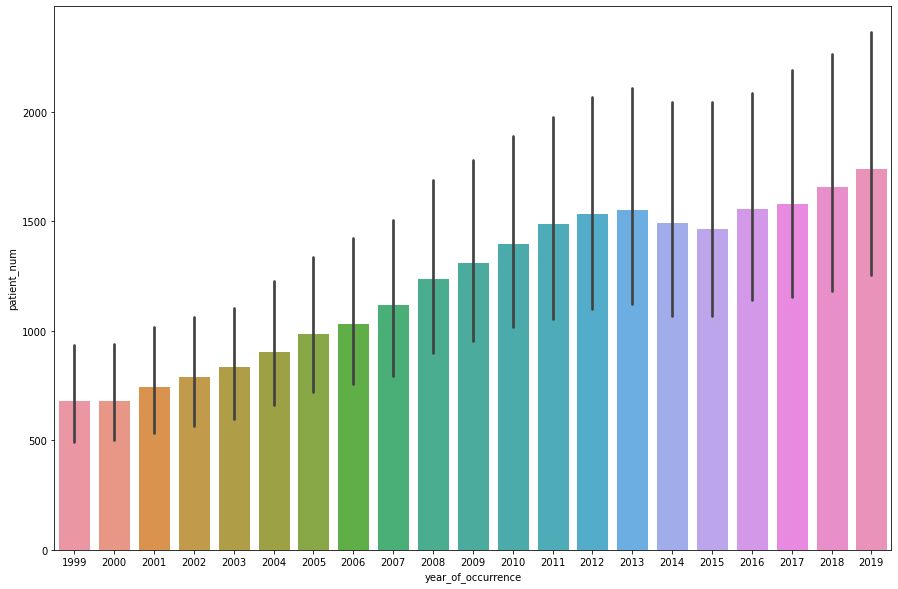

In [62]:
#연도에 따른 환자수 
f,ax=plt.subplots(figsize=(15,10))
sns.set_style('whitegrid')
sns.set_style("ticks", 
              {"xticks.major.size":20,
              "ytick.major.size":20})
sns.barplot(x='year_of_occurrence', 
            y='patient_num',
            data=df)

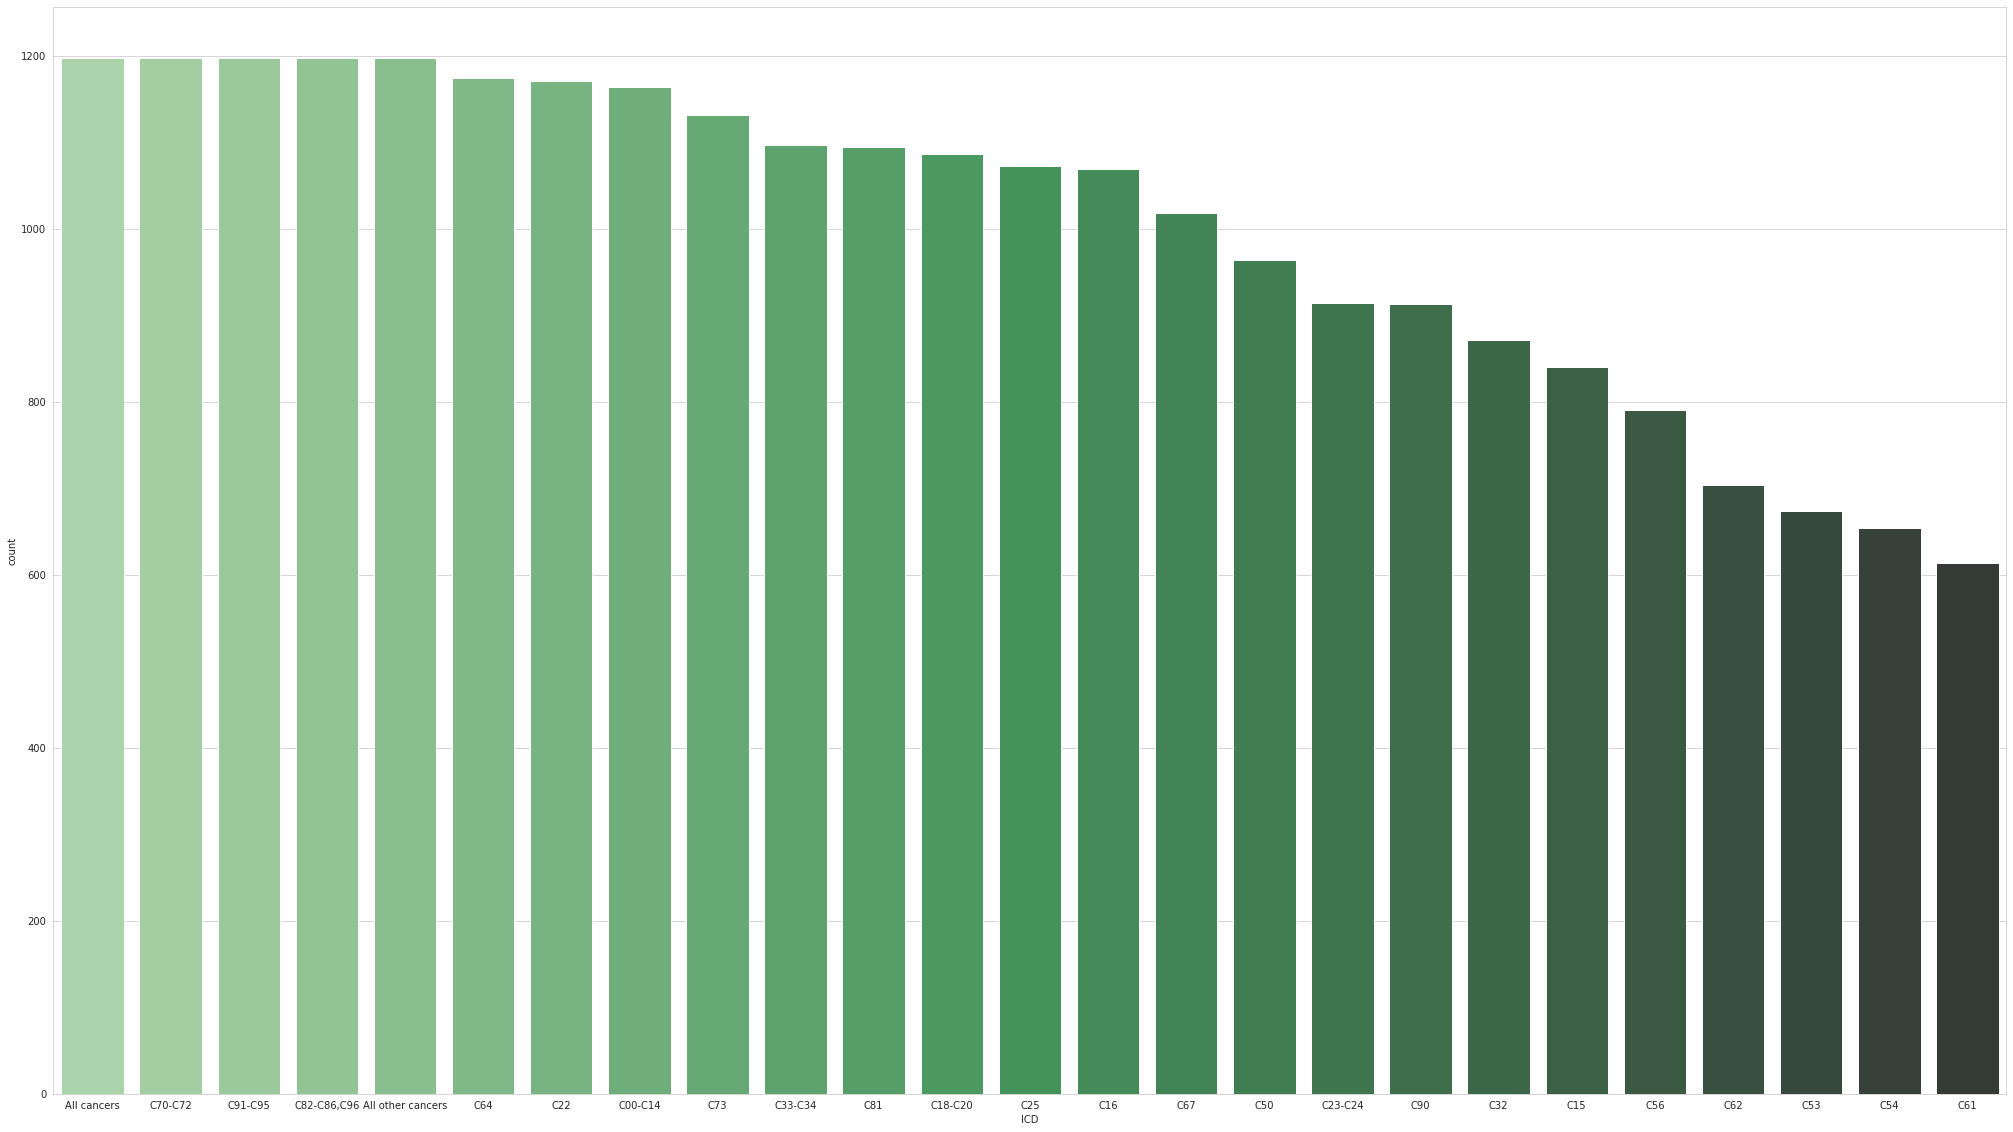

In [67]:
f,ax=plt.subplots(figsize=(35,20))
sns.set_style('whitegrid')
g=sns.countplot(x='ICD', data=df, palette='Greens_d', order=df['ICD'].value_counts().index)


In [64]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

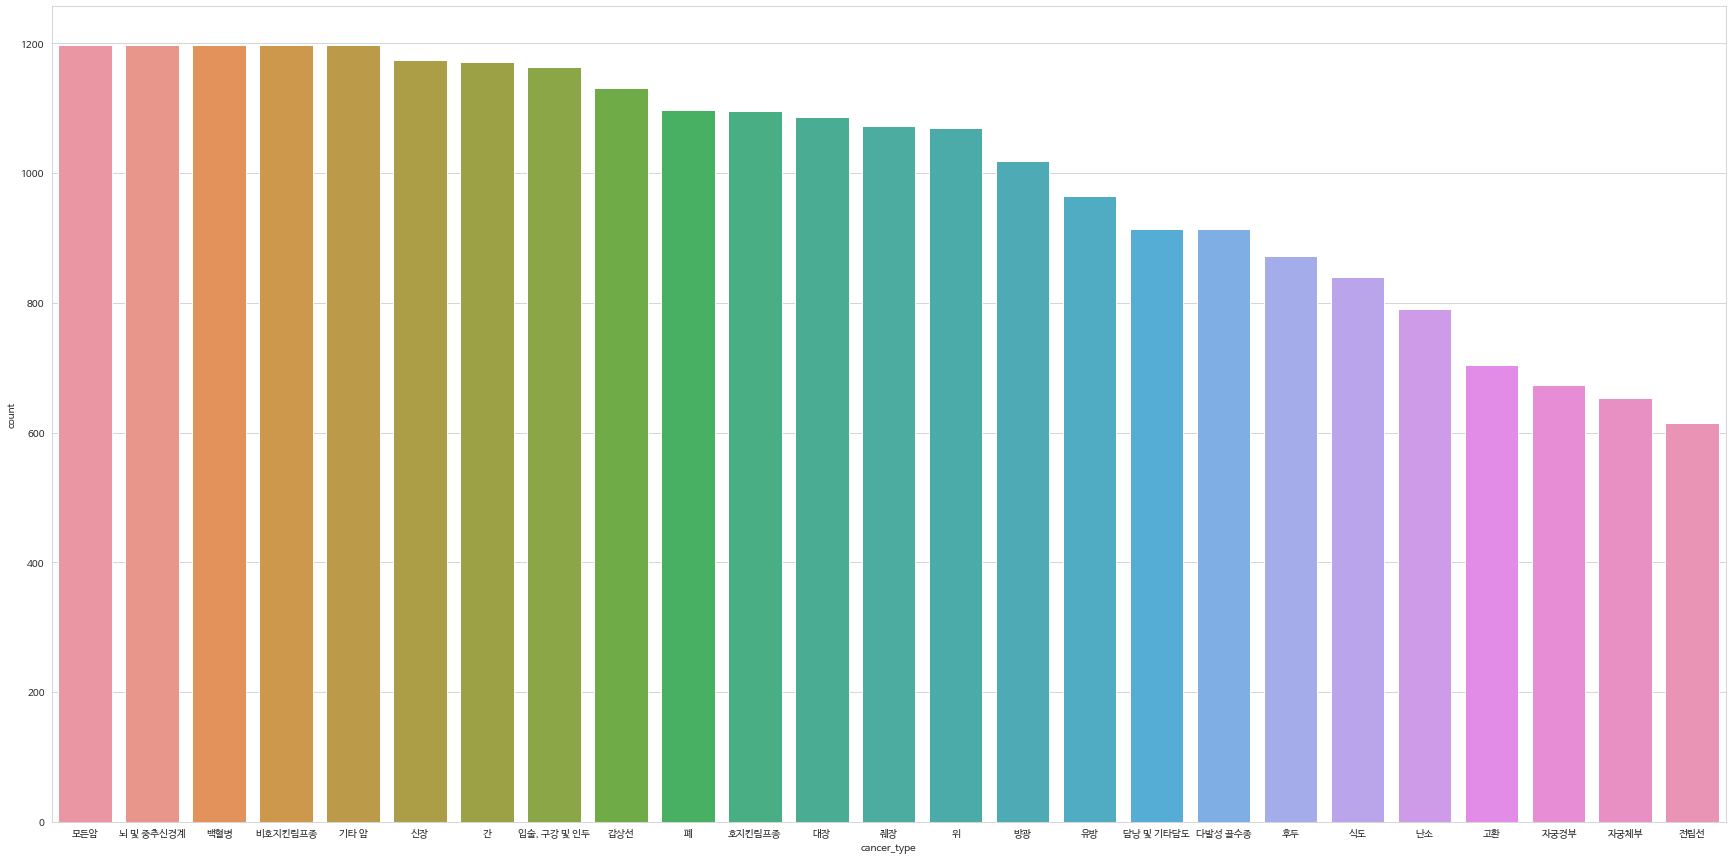

In [70]:
plt.rc('font', family='NanumBarunGothic')
f,ax=plt.subplots(figsize=(30,15))
sns.set_style('whitegrid')
g=sns.countplot(x='cancer_type', data=df, order=df['cancer_type'].value_counts().index)

In [74]:
df['cancer_type'].value_counts(ascending=False)

모든암            1197
뇌 및 중추신경계      1197
백혈병            1197
비호지킨림프종        1197
기타 암           1197
신장             1174
간              1171
입술, 구강 및 인두    1164
갑상선            1131
폐              1097
호지킨림프종         1095
대장             1086
췌장             1072
위              1069
방광             1018
유방              964
담낭 및 기타담도       914
다발성 골수종         913
후두              872
식도              840
난소              790
고환              704
자궁경부            674
자궁체부            654
전립선             614
Name: cancer_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


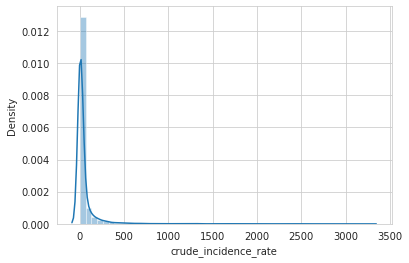

In [73]:
sns.distplot(df['crude_incidence_rate'] )